In [1]:
import torch
from models import DDPG_Policy_Network, DDPG_Value_Network
from utils import Environment, ReplayBuffer, plot_results
from agent import Agent
import numpy as np

# DDPG

In [2]:
reacherWorld = Environment('unity_vector', 'Reacher 2.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
config = {'lr': 0.001, 'alpha': 0.01, 'update_freq': 10, 'gamma': 0.99,
          'tau': 0.001, 'max_nr_steps': 2000, 'n_agents': 20, 'nr_updates': 10, 'noise_scale_init': 0.2,
         'nr_episodes': 200, 'noise_scale_min': 0.01, 'noise_decl': 0.99, 
         'output_freq': 10, 'action_boundaries': [-1, 1]}

In [8]:
online_value_network = DDPG_Value_Network(reacherWorld.observation_space_size, reacherWorld.action_space_size,
                    seed=0, hidden_layers=[128,128])
target_value_network = DDPG_Value_Network(reacherWorld.observation_space_size, reacherWorld.action_space_size,
                     seed=0, hidden_layers=[128,128])
online_policy_network = DDPG_Policy_Network(reacherWorld.observation_space_size, reacherWorld.action_space_size,
                    seed=0, hidden_layers=[128,128])
target_policy_network = DDPG_Policy_Network(reacherWorld.observation_space_size, reacherWorld.action_space_size,
                     seed=0, hidden_layers=[128,128])
memory = ReplayBuffer(buffer_size=100000, batch_size=256, seed=0)
reacher = Agent(online_value_network, target_value_network, online_policy_network, target_policy_network,
               reacherWorld, memory, config, train_mode=True)

In [9]:
results = reacher.train()

/Users/thuis/Documents/trainings/deep-reinforcement-learning/drlnd_project2/agent.py:130: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.online_value_network.parameters(), 1)
/Users/thuis/Documents/trainings/deep-reinforcement-learning/drlnd_project2/agent.py:140: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.online_policy_network.parameters(), 1)


finished episodes 1 - 10 in 171.4841411113739 s. with avg reward 0.24
finished episodes 11 - 20 in 172.04550075531006 s. with avg reward 0.74
finished episodes 21 - 30 in 171.20420908927917 s. with avg reward 2.63
finished episodes 31 - 40 in 173.357164144516 s. with avg reward 15.22
finished episodes 41 - 50 in 173.98749780654907 s. with avg reward 24.34
finished episodes 51 - 60 in 174.15614891052246 s. with avg reward 32.13
finished episodes 61 - 70 in 175.15079188346863 s. with avg reward 36.67
finished episodes 71 - 80 in 177.4815068244934 s. with avg reward 37.13
finished episodes 81 - 90 in 179.05738496780396 s. with avg reward 35.54
finished episodes 91 - 100 in 178.28300285339355 s. with avg reward 35.05
finished episodes 101 - 110 in 180.27439093589783 s. with avg reward 35.77
finished episodes 111 - 120 in 180.80648589134216 s. with avg reward 35.78
finished episodes 121 - 130 in 181.27290415763855 s. with avg reward 35.75
finished episodes 131 - 140 in 181.32475805282593 s.

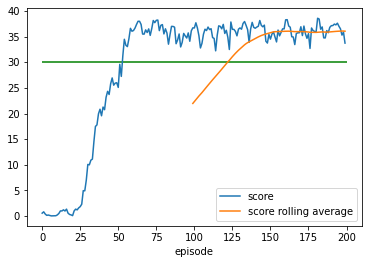

In [10]:
plot_results(np.mean(np.vstack(reacher.all_scores), axis=1), window_size=100, target_score=30)

In [12]:
torch.save(online_value_network.state_dict(), 'online_value_network.pth')
torch.save(target_value_network.state_dict(), 'target_value_network.pth')
torch.save(online_policy_network.state_dict(), 'online_policy_network.pth')
torch.save(target_policy_network.state_dict(), 'target_policy_network.pth')